In [1]:
import pandas as pd

df = pd.read_csv(r"../data/processed/fakeddit_sample.csv")
print(df.head())
print(df['label'].value_counts())


                                                text  \
0  Title:"caught a cicada midrebirth"\n\nis the p...   
1  Title:"dominos uploads a photo of your pizza b...   
2  Title:"uncle original score andrew j jones"\n\...   
3  Title:"the paint has worn off from so many peo...   
4  Title:"bart simpson sidewalk"\n\nis the pictur...   

                                          image_path  label  
0  ../data/datasets/fakeddit_subset/fakeddit_subs...      0  
1  ../data/datasets/fakeddit_subset/fakeddit_subs...      0  
2  ../data/datasets/fakeddit_subset/fakeddit_subs...      1  
3  ../data/datasets/fakeddit_subset/fakeddit_subs...      0  
4  ../data/datasets/fakeddit_subset/fakeddit_subs...      1  
label
0    553
1    447
Name: count, dtype: int64


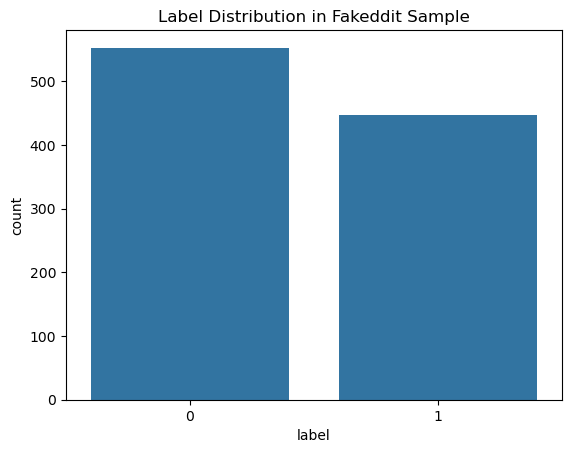

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Label Distribution in Fakeddit Sample")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.64      0.60        99
           1       0.60      0.52      0.56       101

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalAveragePooling1D, Dropout, Dense

# Load the already-tokenized data
data = np.load("../data/processed/news_text_data.npz", allow_pickle=True)
X_train_pad = data["X_train"]  # Already tokenized and padded
X_val_pad = data["X_val"]      # Already tokenized and padded
y_train = data["y_train"]
y_val = data["y_val"]

print(f"Train samples: {len(X_train_pad)}, Validation samples: {len(X_val_pad)}")
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_val_pad shape: {X_val_pad.shape}")

# Get sequence length and vocabulary size
max_len = X_train_pad.shape[1]
vocab_size = X_train_pad.max() + 1  # +1 because indices start at 0

print(f"Sequence length (max_len): {max_len}")
print(f"Vocabulary size: {vocab_size}")

# Check labels
print(f"\nLabel distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Class {label}: {count} samples ({count/len(y_train)*100:.2f}%)")

Train samples: 35918, Validation samples: 8980
X_train_pad shape: (35918, 300)
X_val_pad shape: (8980, 300)
Sequence length (max_len): 300
Vocabulary size: 20000

Label distribution:
  Class 0: 18771 samples (52.26%)
  Class 1: 17147 samples (47.74%)


In [17]:
# Build the Bidirectional LSTM model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\karbi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 352s 302ms/step - accuracy: 0.9659 - loss: 0.0839 - val_accuracy: 0.9963 - val_loss: 0.0134
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 341s 304ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.9951 - val_loss: 0.0134
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 357s 318ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9901 - val_loss: 0.0404
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 365s 325ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9957 - val_loss: 0.0218
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 382s 341ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9938 - val_loss: 0.0247
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 371s 331ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9929 - val_loss: 0.0352
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 370s 329ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9967 - val_loss: 0.0198
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 369s 329ms/step - ac

In [19]:
y_pred = (model.predict(X_val_pad) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 32s 110ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



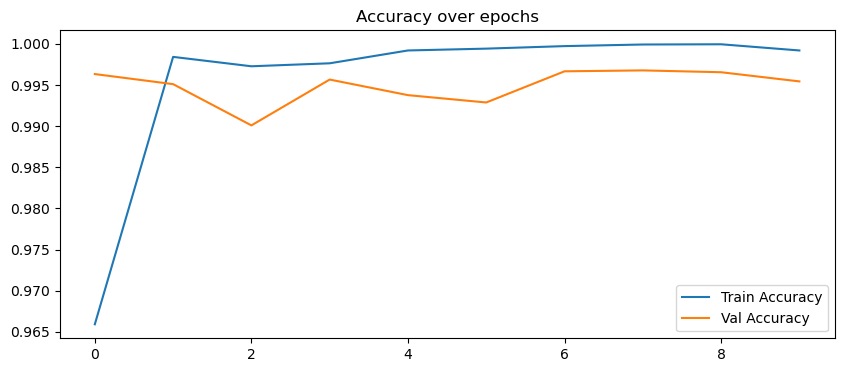

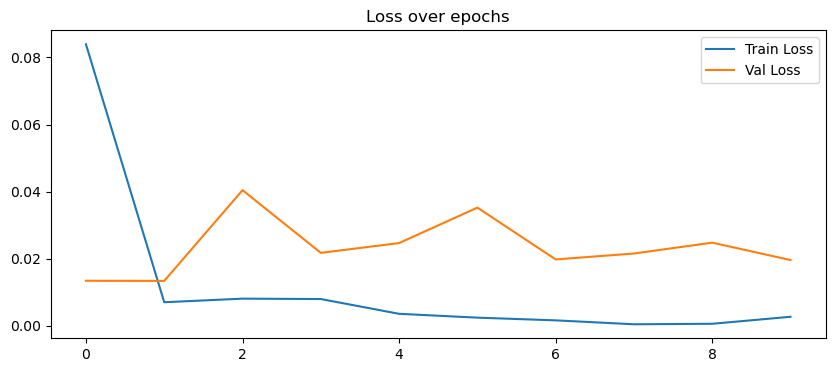

In [20]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()


In [21]:
model.save("../models/text_bilstm_model.h5")
print("Model saved to ../models/text_bilstm_model.h5")

Model saved to ../models/text_bilstm_model.h5
